# Skin Cancer Classification -- What are we going to do today!

<img src="images/skin.jpg">

The following article introduces this work done by Andre Esteva and his team, Dermatologist-level classification of skin cancer with deep neural networks.

The versatility of the smartphone is starting to have a serious impact in the medical world, with the ability to reveal low red blood cell counts, sleep apnea and even HIV all very real possibilities. Skin cancer too is a condition that might feel the wrath of these modern diagnostic tools, with an iPhone app way back in 2011 offering risk assessments on suspect moles. But a new research project at Stanford University is promising to bring things up to a professional grade of diagnosis, through a deep learning algorithm that can detect potential cancers with the same accuracy as dermatologists in early tests.

As is the case with all cancers, early detection of skin cancer is critical to survival rates. For melanoma detected in its early stages, the five-year survival rate is 97 percent, but those detected in its later stages carry a survival rate of just 14 percent. However, not everybody has ready access or the funds to drop by the doctor's office and get their skin oddities checked out as soon as they appear.

#### Step 0: Getting the data

A bit about data and pre-processing

#### Step 1: Importing necessary modules

#### Step 2: Loading a pre-trained module already 

Something about the pre-trained models such as InceptionV3, ResNets, GoogLeNet etc

#### Step 3: Pre-processing the data

#### Step 4: Building your model

#### Step 5: Training your model

#### Step 6: Doing some Transfer Learning

#### Step 7: Prediction function and classifying images

#### Addendum : Lot's of Rinse and Repeat in between  😀

WQe do a lot of stuff such as playing around with the learning_rate, 

#### Addendum on Steroids : Homework Exercise

1. Build an App with Android (using TensorFlow Lite) or iOS (Apple's coreML package)

###### Useful Links:
1. [Stanford article](https://news.stanford.edu/2017/01/25/artificial-intelligence-used-identify-skin-cancer/)
2. [Other news - Startup Grind](https://medium.com/startup-grind/how-can-ai-detect-skin-cancer-with-your-smartphone-df65cf040d48)
3. [Research paper](https://www.nature.com/articles/nature21056.epdf)

Notes: [Waya.ai's link gone dead](https://blog.waya.ai/ground-up-hands-on-deep-learning-tutorial-diagnosing-skin-cancer-w-dermatologist-level-61a90fe9f269)

4. More useful links as of Jan 2018 - see if still workds else modify the code to do so:
[ISIC Archive downloader : ](https://github.com/GalAvineri/ISIC-Archive-Downloader)

5. [Original contest was here: ](https://challenge.kitware.com/#phase/5840f53ccad3a51cc66c8dab)
[Udacity's wrapper on the contest is here -->](https://github.com/udacity/dermatologist-ai)
[Dasato](https://dasoto.github.io/skincancer/)

6. More links for ideas: [VGG, scrape and more](https://github.com/tanmoyopenroot/cancer_nn) | [Skin-Lesion-Analysis](https://github.com/JiteshPshah/Skin-Lesion-Analysis-Towards-Melanoma-Detection) | [RECOD guys](https://github.com/learningtitans/isbi2017-part3), [train_image](https://github.com/learningtitans/isbi2017-part3/blob/master/train_image_classifier.py) | [Inception modules explained](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/) | [VGG transfer learning](https://github.com/swapnilpote/isic-2017) | 

7. Interesting article to learn from
1. https://hackernoon.com/machine-learning-for-isic-skin-cancer-classification-challenge-part-1-ccddea4ec44a
2. https://hackernoon.com/transfer-learning-in-the-cloud-for-the-isic-cancer-classification-challenge-e0898bffcc52



**Before we start** [No need to do this on your own server though), [more information look here](https://www.tensorflow.org/programmers_guide/using_gpu)

```python

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config, ...)
```

## Step 1 : Import the necessary modules 

In [5]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input,decode_predictions
from keras.preprocessing import image
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,Input
# from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.models import Sequential, Model
from keras import backend as K
from IPython.display import display

## Step 2 : Load the pre-trained model 

More about the [pre-trained models](https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/)

In [6]:
"""
Signature: InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
Docstring:
Instantiates the Inception v3 architecture.

Optionally loads weights pre-trained
on ImageNet. Note that when using TensorFlow,
for best performance you should set
`image_data_format='channels_last'` in your Keras config
at ~/.keras/keras.json.
The model and the weights are compatible with both
TensorFlow and Theano. The data format
convention used by the model is the one
specified in your Keras config file.
Note that the default input image size for this model is 299x299.

# Arguments
    include_top: whether to include the fully-connected
        layer at the top of the network.
    weights: one of `None` (random initialization)
        or 'imagenet' (pre-training on ImageNet).
    input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
        to use as image input for the model.
    input_shape: optional shape tuple, only to be specified
        if `include_top` is False (otherwise the input shape
        has to be `(299, 299, 3)` (with `channels_last` data format)
        or `(3, 299, 299)` (with `channels_first` data format).
        It should have exactly 3 inputs channels,
        and width and height should be no smaller than 139.
        E.g. `(150, 150, 3)` would be one valid value.
    pooling: Optional pooling mode for feature extraction
        when `include_top` is `False`.
        - `None` means that the output of the model will be
            the 4D tensor output of the
            last convolutional layer.
        - `avg` means that global average pooling
            will be applied to the output of the
            last convolutional layer, and thus
            the output of the model will be a 2D tensor.
        - `max` means that global max pooling will
            be applied.
    classes: optional number of classes to classify images
        into, only to be specified if `include_top` is True, and
        if no `weights` argument is specified.

# Returns
    A Keras model instance.
"""
base_model  = InceptionV3(weights= 'imagenet', include_top=False)
print('loaded model')

loaded model


## Step 3 : Pre-processing the data

- Read more on Keras documentation [here](https://keras.io/preprocessing/image/)

An example:
```python
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())
```    

Example code:

```python
# we create two instances with the same arguments
data_gen_args = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90.,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

```

In [7]:
#Define the dictionary for Image data Generator
data_gen_args = dict(preprocessing_function=preprocess_input,
                     rotation_range=30,
                     width_shift_range=0.2,
                     height_shift_range=0.2,
                     shear_range=0.2,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     vertical_flip = True)

# create two instances with the same arguments for train and test // basically you're merging stuff here
train_datagen = image.ImageDataGenerator(**data_gen_args)
test_datagen = image.ImageDataGenerator(**data_gen_args)

### 3.1 Loading the data

In [34]:
train_generator = train_datagen.flow_from_directory("data/train", target_size=(299,299), batch_size=100)

valid_generator = test_datagen.flow_from_directory("data/valid", target_size=(299,299), batch_size=100)

Found 2000 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


## Step 4:  Building your model


#### Building your model architecture

**BTW -- you should see something like this on the terminal**

On your own dedicated box you don't need to throttle the GPU use but on a shared box )or shared activities with your own GPU operations, you can add the command we provided in the first cell of this notebook.

```shell
2018-02-15 11:21:51.550974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:895] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-02-15 11:21:51.551358: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1105] Found device 0 with properties: 
name: GeForce GTX 1080 major: 6 minor: 1 memoryClockRate(GHz): 1.7335
pciBusID: 0000:01:00.0
totalMemory: 7.93GiB freeMemory: 7.81GiB
2018-02-15 11:21:51.551372: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1195] Creating TensorFlow device (/device:GPU:0) -> (device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1)
```

In [35]:
from keras.layers import Conv2D,MaxPooling2D,Flatten

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (299,299,3)))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_192 (Conv2D)          (None, 299, 299, 16)      208       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 150, 150, 32)      2080      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 75, 75, 64)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 38, 38, 64)        0         
__________

### Compile your model


In [37]:
model.compile(loss = 'categorical_crossentropy',optimizer='rmsprop', metrics = ['accuracy'])

#### Early stopping

**What it is?**

In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration. Up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error. Early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit. Early stopping rules have been employed in many different machine learning methods, with varying amounts of theoretical foundation.
More on [Wikipedia](https://en.wikipedia.org/wiki/Early_stopping)

**How we do it in Keras**

```python

keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
Stop training when a monitored quantity has stopped improving.
```


In [38]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Save the model with best weights, do create a model folder with mkdir saved_model
checkpointer = ModelCheckpoint('saved_model/model.hdf5', verbose=1,save_best_only=True)
# Stop the training if the model shows no improvement 
stopper = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=0,verbose=1,mode='auto')

## Step 5 : Training your model

In [13]:
history = model.fit_generator(train_generator, 
                                  steps_per_epoch = 20,
                                  validation_data=valid_generator,
                                  validation_steps=3, 
                                  epochs=60,
                                  verbose=1,
                                  callbacks=[checkpointer])

Epoch 1/60
20/20 [==============================] - 41s - loss: 4.0335 - acc: 0.7250 - val_loss: 8.7306 - val_acc: 0.4583
Epoch 2/60
20/20 [==============================] - 32s - loss: 5.1880 - acc: 0.6781 - val_loss: 7.0517 - val_acc: 0.5625
Epoch 3/60
20/20 [==============================] - 27s - loss: 5.3895 - acc: 0.6656 - val_loss: 8.9074 - val_acc: 0.4474
Epoch 4/60
20/20 [==============================] - 32s - loss: 5.3895 - acc: 0.6656 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/60
20/20 [==============================] - 29s - loss: 4.7347 - acc: 0.7063 - val_loss: 8.3948 - val_acc: 0.4792
Epoch 6/60
20/20 [==============================] - 34s - loss: 5.4399 - acc: 0.6625 - val_loss: 7.3875 - val_acc: 0.5417
Epoch 7/60
20/20 [==============================] - 28s - loss: 4.5332 - acc: 0.7188 - val_loss: 9.7380 - val_acc: 0.3958
Epoch 8/60
20/20 [==============================] - 31s - loss: 4.8858 - acc: 0.6969 - val_loss: 6.7866 - val_acc: 0.5789
Epoch 9/60
20/20 [======

## Step 6:  Transfer Learning

**What is it?**

Models out there





Transfer learning is a machine learning method which utilizes a pre-trained neural network. For example, the image recognition model called Inception-v3 consists of two parts:

- Feature extraction part with a convolutional neural network.
- Classification part with fully-connected and softmax layers.

The pre-trained Inception-v3 model achieves state-of-the-art accuracy for recognizing general objects with 1000 classes, like "Zebra", "Dalmatian", and "Dishwasher". The model extracts general features from input images in the first part and classifies them based on those features in the second part.

<img src="https://codelabs.developers.google.com/codelabs/cpb102-txf-learning/img/bfea25ba557fbffc.png">

**Links**


In transfer learning, when you build a new model to classify your original dataset, you reuse the feature extraction part and re-train the classification part with your dataset. Since you don't have to train the feature extraction part (which is the most complex part of the model), you can train the model with less computational resources and training time.

[1](https://kwotsin.github.io/tech/2017/02/11/transfer-learning.html)
[2 Goog Codelab](https://codelabs.developers.google.com/codelabs/cpb102-txf-learning/index.html?index=..%2F..%2Findex#1)

Explain a bit about it...

**Little tip:**

Watch out for this error if you do
```python
model = Model(input=...)
```
it might throw this error:
```shell
UserWarning: Update your Model call to the Keras 2 API: Model(inputs=Tensor("in..., outputs=Tensor("de...)
```

In [ ]:
# Define the output layers for Inceptionv3
last = base_model.output
x = GlobalAveragePooling2D()(last)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(3,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=preds)
model.summary()

### Loading weights for your model

**A little bit about HDF5**

HDF5 is a data model, library, and file format for storing and managing data. It supports an unlimited variety of datatypes, and is designed for flexible and efficient I/O and for high volume and complex data. HDF5 is portable and is extensible, allowing applications to evolve in their use of HDF5. The HDF5 Technology suite includes tools and applications for managing, manipulating, viewing, and analyzing data in the HDF5 format.

[link:](https://support.hdfgroup.org/HDF5/) or [Wikipedia definition](https://en.wikipedia.org/wiki/Hierarchical_Data_Format)

In [40]:
#Load the weights for the common layers from the benchmark model
base_model.load_weights(filepath='saved_model/model.hdf5',by_name=True)

### Freeze the original layers of Inception3

A bit on finetuning trained models

[An example on fine-tuning InceptionV3 in keras](https://flyyufelix.github.io/2016/10/08/fine-tuning-in-keras-part2.html). Please look for latest work out there since this is from Oct 2016 and there might be latest stuff out there.

In [41]:
for layer in base_model.layers:
    layer.trainable = False

### Compile the model 

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Save the model with best weights
checkpointer = ModelCheckpoint('saved_model/transfer_learning.hdf5', verbose=1,save_best_only=True)
# Stop the training if the model shows no improvement
stopper = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=1,verbose=1,mode='auto')

In [19]:
# Train the model
history_transfer = model.fit_generator(train_generator, 
                                       steps_per_epoch = 20,
                                       validation_data=valid_generator,
                                       validation_steps=3, 
                                       epochs=100,
                                       verbose=1,
                                       callbacks=[checkpointer])

Epoch 1/100
20/20 [==============================] - 48s - loss: 1.3529 - acc: 0.5406 - val_loss: 1.8630 - val_acc: 0.5625
Epoch 2/100
20/20 [==============================] - 25s - loss: 0.9084 - acc: 0.6875 - val_loss: 1.9469 - val_acc: 0.5625
Epoch 3/100
20/20 [==============================] - 33s - loss: 0.9225 - acc: 0.6562 - val_loss: 1.5981 - val_acc: 0.5789
Epoch 4/100
20/20 [==============================] - 32s - loss: 0.8629 - acc: 0.6625 - val_loss: 1.4323 - val_acc: 0.4792
Epoch 5/100
20/20 [==============================] - 28s - loss: 0.8560 - acc: 0.6406 - val_loss: 1.1837 - val_acc: 0.5208
Epoch 6/100
20/20 [==============================] - 33s - loss: 0.8256 - acc: 0.6687 - val_loss: 1.1413 - val_acc: 0.5417
Epoch 7/100
20/20 [==============================] - 30s - loss: 0.7538 - acc: 0.7063 - val_loss: 1.0466 - val_acc: 0.5000
Epoch 8/100
20/20 [==============================] - 25s - loss: 0.7783 - acc: 0.6813 - val_loss: 1.1373 - val_acc: 0.5526
Epoch 9/100
20/2

20/20 [==============================] - 30s - loss: 0.6955 - acc: 0.7063 - val_loss: 0.9474 - val_acc: 0.5208
Epoch 67/100
20/20 [==============================] - 27s - loss: 0.7019 - acc: 0.7344 - val_loss: 0.8206 - val_acc: 0.6250
Epoch 68/100
20/20 [==============================] - 30s - loss: 0.7368 - acc: 0.6937 - val_loss: 0.9536 - val_acc: 0.5000
Epoch 69/100
20/20 [==============================] - 30s - loss: 0.7620 - acc: 0.7063 - val_loss: 0.7975 - val_acc: 0.6250
Epoch 70/100
20/20 [==============================] - 34s - loss: 0.6877 - acc: 0.7219 - val_loss: 0.9748 - val_acc: 0.5625
Epoch 71/100
20/20 [==============================] - 33s - loss: 0.7151 - acc: 0.6875 - val_loss: 0.8592 - val_acc: 0.5625
Epoch 72/100
20/20 [==============================] - 29s - loss: 0.7088 - acc: 0.7094 - val_loss: 0.8758 - val_acc: 0.6250
Epoch 73/100
20/20 [==============================] - 30s - loss: 0.7132 - acc: 0.7094 - val_loss: 0.8202 - val_acc: 0.6316
Epoch 74/100
20/20 [=

#### (Optional) Display the dictionary of training metrics values

In [20]:
display(history_transfer.history)

{'acc': [0.54062500000000002,
  0.6875,
  0.65625,
  0.66249999999999998,
  0.640625,
  0.66874999999999996,
  0.70625000000000004,
  0.68125000000000002,
  0.66249999999999998,
  0.69687500000000002,
  0.68125000000000002,
  0.65312499999999996,
  0.70625000000000004,
  0.73750000000000004,
  0.671875,
  0.6875,
  0.66249999999999998,
  0.65937500000000004,
  0.671875,
  0.734375,
  0.66249999999999998,
  0.69062500000000004,
  0.72812500000000002,
  0.734375,
  0.65625,
  0.69999999999999996,
  0.640625,
  0.69687500000000002,
  0.73750000000000004,
  0.69062500000000004,
  0.66562500000000002,
  0.69374999999999998,
  0.64375000000000004,
  0.67812499999999998,
  0.703125,
  0.71875,
  0.703125,
  0.66249999999999998,
  0.671875,
  0.71250000000000002,
  0.71250000000000002,
  0.66874999999999996,
  0.69374999999999998,
  0.73750000000000004,
  0.703125,
  0.69062500000000004,
  0.69062500000000004,
  0.69062500000000004,
  0.70937499999999998,
  0.67812499999999998,
  0.69062500000

### Finally, Plotting the graph for accuracy and loss 

But lets define a simple function first...

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_training(history):
    acc = history.history['acc'] 
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs  = range(len(acc))
    
    plt.figure()
    plt.plot(epochs,acc,'b')
    plt.plot(epochs,val_acc,'r')
    plt.title("Training and validation accuracy")
    
    plt.figure()
    plt.plot(epochs,loss,'b')
    plt.plot(epochs,val_loss,'r')
    plt.title("Training and validation loss")
    
    plt.show()

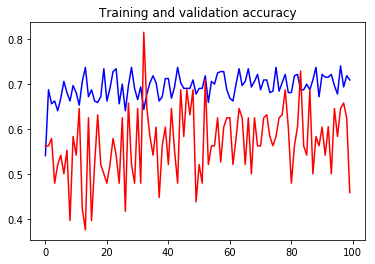

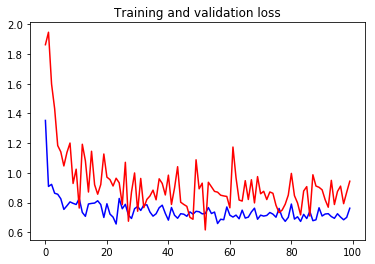

In [45]:
plot_training(history_transfer)

### Can we do some fine tuning 

- Unfreezing modules at the end and see what works?
- Any other techniques?

[Research more here] : Good homework for you guys and me! 😁

In [46]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 conv2d_95
2 batch_normalization_95
3 activation_95
4 conv2d_96
5 batch_normalization_96
6 activation_96
7 conv2d_97
8 batch_normalization_97
9 activation_97
10 max_pooling2d_5
11 conv2d_98
12 batch_normalization_98
13 activation_98
14 conv2d_99
15 batch_normalization_99
16 activation_99
17 max_pooling2d_6
18 conv2d_103
19 batch_normalization_103
20 activation_103
21 conv2d_101
22 conv2d_104
23 batch_normalization_101
24 batch_normalization_104
25 activation_101
26 activation_104
27 average_pooling2d_10
28 conv2d_100
29 conv2d_102
30 conv2d_105
31 conv2d_106
32 batch_normalization_100
33 batch_normalization_102
34 batch_normalization_105
35 batch_normalization_106
36 activation_100
37 activation_102
38 activation_105
39 activation_106
40 mixed0
41 conv2d_110
42 batch_normalization_110
43 activation_110
44 conv2d_108
45 conv2d_111
46 batch_normalization_108
47 batch_normalization_111
48 activation_108
49 activation_111
50 average_pooling2d_11
51 conv2d_107
52 conv2d_109
53 co

### (Optional) Can we come back and unfreeze layers at the tail? 

Unfreeze the last X number of layers in the model and train these as well?
try only for inception

In [57]:
# Does it help if we unfreeze some layers up front
# reminder to self, come back if the accuracies don't improve

for layer in model.layers[:197]:
    layer.trainable = False
for layer in model.layers[197:]:
    layer.trainable = True

### Let's Compile again

What happens if we slow down the learning rate?

In [58]:
from keras.optimizers import adam

# use with slow learning rate and momentum to standard value
model.compile(optimizer=adam(lr=0.0001, beta_1=0.9, beta_2=0.999),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [59]:
# Save the mode wirth best validation loss

checkpointer = ModelCheckpoint("saved_model/fine_tuning.hdf5",
                              verbose = 1,
                              save_best_only = True,
                              monitor = "val_loss")

# Also we ensure that training stops if the validation loss doesn't improve

stoptheshow = EarlyStopping(monitor = 'val_loss, val_acc',
                           min_delta = 0.1,
                           patience = 2,
                           verbose = 1,
                           mode = 'auto')

#### Train this baby again!

In [60]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=20,
                              validation_data = valid_generator,
                              validation_steps = 3,
                              epochs = 100,
                              verbose = 1,
                              callbacks = [checkpointer]
                             )

Epoch 1/100
20/20 [==============================] - 255s - loss: 0.8761 - acc: 0.6295 - val_loss: 1.0519 - val_acc: 0.5360
Epoch 2/100
20/20 [==============================] - 194s - loss: 0.6500 - acc: 0.7250 - val_loss: 0.9964 - val_acc: 0.5840
Epoch 3/100
20/20 [==============================] - 195s - loss: 0.6036 - acc: 0.7460 - val_loss: 1.0438 - val_acc: 0.5640
Epoch 4/100
20/20 [==============================] - 196s - loss: 0.5331 - acc: 0.7680 - val_loss: 0.8553 - val_acc: 0.6360
Epoch 5/100
20/20 [==============================] - 195s - loss: 0.4854 - acc: 0.8000 - val_loss: 0.8249 - val_acc: 0.6760
Epoch 6/100
20/20 [==============================] - 194s - loss: 0.4346 - acc: 0.8205 - val_loss: 0.8275 - val_acc: 0.7040
Epoch 7/100
20/20 [==============================] - 195s - loss: 0.3890 - acc: 0.8395 - val_loss: 0.8565 - val_acc: 0.6640
Epoch 8/100
20/20 [==============================] - 196s - loss: 0.3614 - acc: 0.8530 - val_loss: 0.7993 - val_acc: 0.7000
Epoch 9/

20/20 [==============================] - 195s - loss: 0.0258 - acc: 0.9915 - val_loss: 1.2018 - val_acc: 0.7640
Epoch 68/100
20/20 [==============================] - 195s - loss: 0.0316 - acc: 0.9900 - val_loss: 1.3300 - val_acc: 0.7840
Epoch 69/100
20/20 [==============================] - 195s - loss: 0.0347 - acc: 0.9865 - val_loss: 1.3740 - val_acc: 0.7680
Epoch 70/100
20/20 [==============================] - 195s - loss: 0.0363 - acc: 0.9900 - val_loss: 1.3070 - val_acc: 0.7480
Epoch 71/100
20/20 [==============================] - 194s - loss: 0.0337 - acc: 0.9885 - val_loss: 1.2863 - val_acc: 0.7680
Epoch 72/100
20/20 [==============================] - 195s - loss: 0.0269 - acc: 0.9910 - val_loss: 1.5147 - val_acc: 0.7360
Epoch 73/100
20/20 [==============================] - 195s - loss: 0.0285 - acc: 0.9890 - val_loss: 1.2533 - val_acc: 0.7680
Epoch 74/100
20/20 [==============================] - 195s - loss: 0.0272 - acc: 0.9890 - val_loss: 1.1389 - val_acc: 0.7640
Epoch 75/100


## Step 7:  Let's write our Prediction Function

1. First load the model you just saved
2. Then we write the prediction function
3. Then we predict :)

In [62]:
# Step 1 : load the trained model
model.load_weights('saved_model/fine_tuning.hdf5')

In [63]:
# Predict
from keras.preprocessing.image import img_to_array, load_img
import cv2

def predict_cancer(img_path):
    # first we load img and set targt size of our input model
    img = load_img(img_path, target_size = (299, 299))
    x = img_to_array(img)                 # coverting image to array
    x = np.expand_dims(x, axis=0)         # transform arrray to form a (1, x, y, z)
    x = preprocess_input(x)               # use preprocess input function , subtract the mean of all images
    p = np.argmax(model.predict(x))       # Store the argmax the predictions
    
    if p == 0:
        print("melanoma")
    elif p == 1:
        print("nevus")
    elif p == 2:
        print("seborrheic_keratosis")

melanoma


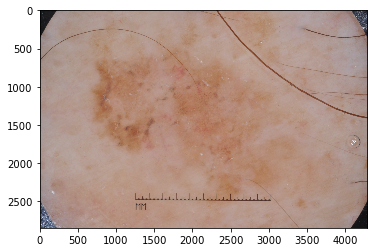

In [65]:
predict_cancer("data/test/melanoma/ISIC_0014181.jpg")
z = plt.imread("data/test/melanoma/ISIC_0014181.jpg")
plt.imshow(z)

nevus


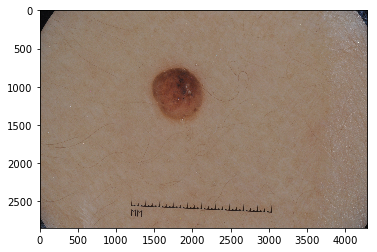

In [66]:
predict_cancer("data/test/nevus/ISIC_0012551.jpg")
z = plt.imread("data/test/nevus/ISIC_0012551.jpg")
plt.imshow(z)

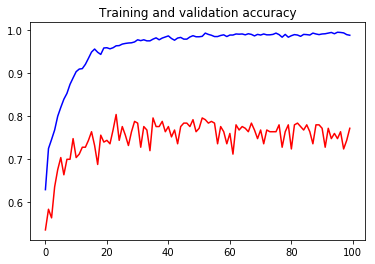

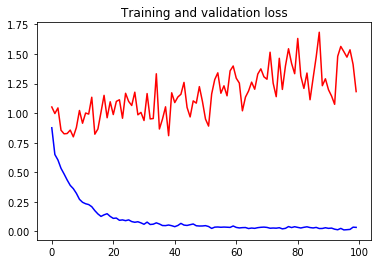

In [67]:
plot_training(history)